In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fer2013/fer2013.csv


## Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Hiển thị đồ thị trong notebook
%matplotlib inline


## Đọc file csv

In [32]:
df = pd.read_csv('/kaggle/input/fer2013/fer2013.csv')
df.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [33]:
print("Số dòng:", len(df))
print("Các cột:", df.columns.tolist())
print("Các giá trị Usage:", df['Usage'].unique())


Số dòng: 35887
Các cột: ['emotion', 'pixels', 'Usage']
Các giá trị Usage: ['Training' 'PublicTest' 'PrivateTest']


## Phân bổ số lượng cảm xúc

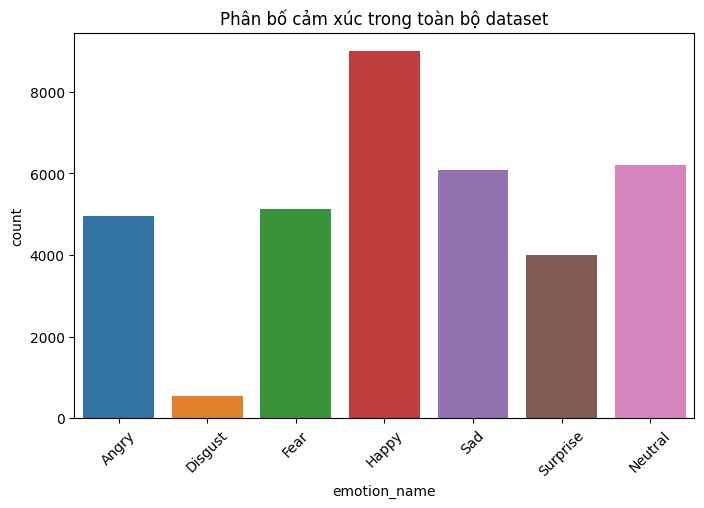

In [34]:
emotion_labels = {
    0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy',
    4: 'Sad', 5: 'Surprise', 6: 'Neutral'
}

df['emotion_name'] = df['emotion'].map(emotion_labels)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='emotion_name', order=emotion_labels.values())
plt.title("Phân bố cảm xúc trong toàn bộ dataset")
plt.xticks(rotation=45)
plt.show()


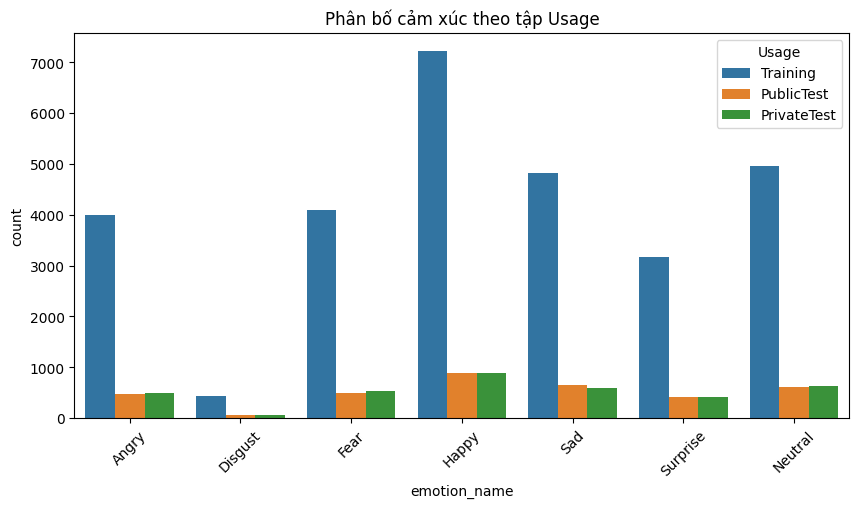

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='emotion_name', hue='Usage', order=emotion_labels.values())
plt.title("Phân bố cảm xúc theo tập Usage")
plt.xticks(rotation=45)
plt.show()

# Thống kê số lượng mẫu theo từng tập
df['Usage'].value_counts()


## Ảnh mẫu

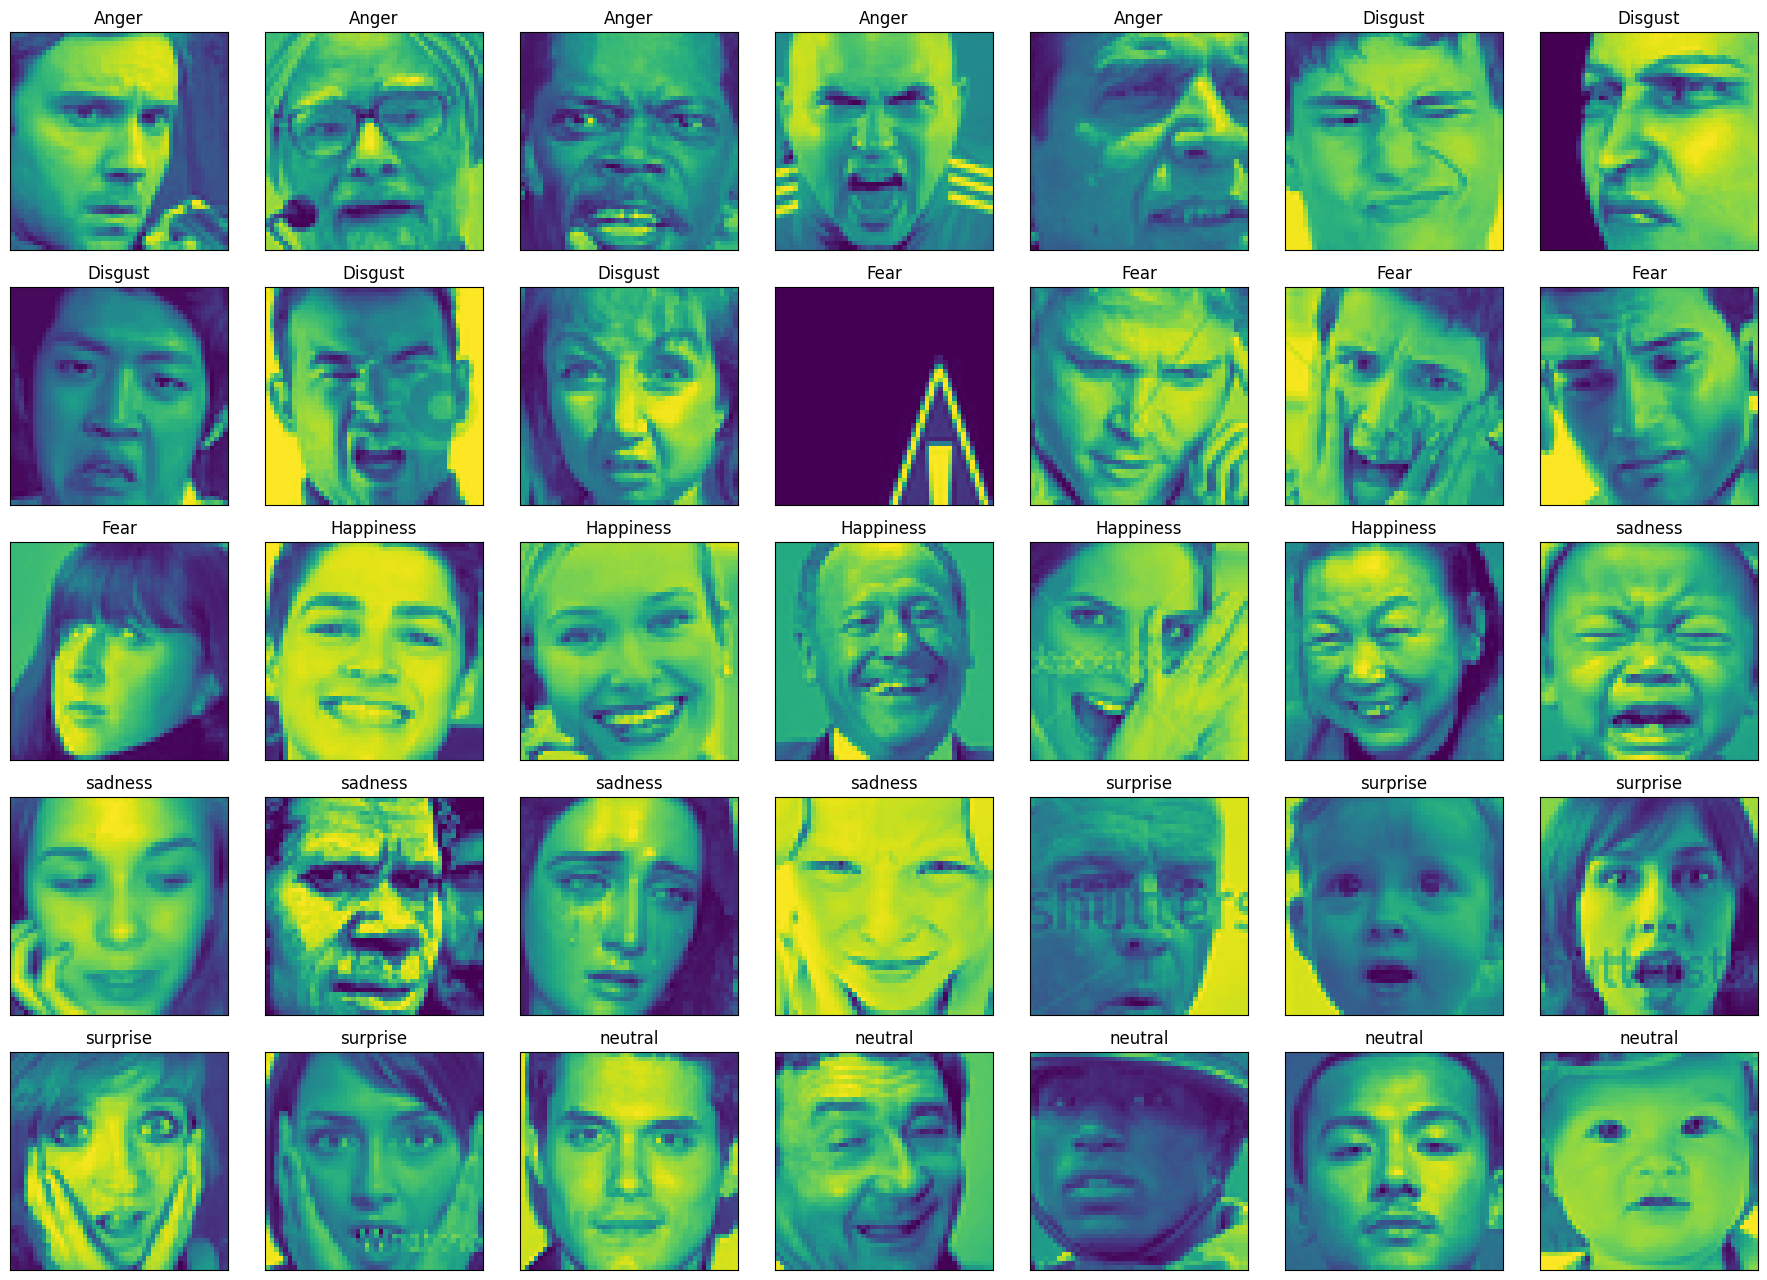

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(1, (18, 18))
k = 0

for label in sorted(data.emotion.unique()):
    for j in range(5):
        px = data[data.emotion == label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7,7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        plt.tight_layout()

## Thống kê pixel

In [37]:
df['pixels_array'] = df['pixels'].apply(lambda x: np.fromstring(x, sep=' ', dtype='float32'))

pixel_means = df['pixels_array'].apply(np.mean)
pixel_stds = df['pixels_array'].apply(np.std)

print(f"Trung bình pixel toàn tập: {pixel_means.mean():.2f}")
print(f"Độ lệch chuẩn pixel toàn tập: {pixel_stds.mean():.2f}")


Trung bình pixel toàn tập: 129.39
Độ lệch chuẩn pixel toàn tập: 54.06


## Kiểm tra xem có labels nào bị gán nhãn sai hay không

In [46]:
# Đo độ lệch chuẩn
# Nếu độ lêch chuẩn thấp -> ảnh quá ít chi tiết mà mô hình có thể học được từ ảnh
df['pixel_std'] = df['pixels_array'].apply(np.std)
low_detail = df[df['pixel_std'] < 12]  # Ngưỡng có thể điều chỉnh

print(f"Số ảnh ít chi tiết (nghi ngờ lỗi): {len(low_detail)}")


Số ảnh ít chi tiết (nghi ngờ lỗi): 16


In [42]:
# Kiểm tra pixel_mean
# Nếu giá trị quá thấp hoặc quá cao sẽ ảnh hưởng tới đặc trưng của ảnh
df['pixel_mean'] = df['pixels_array'].apply(np.mean)
suspicious = df[(df['pixel_mean'] < 10) | (df['pixel_mean'] > 240)]

print(f"Số ảnh nghi ngờ do quá tối hoặc quá sáng: {len(suspicious)}")


Số ảnh nghi ngờ do quá tối hoặc quá sáng: 37


## Kiểm tra số lượng ảnh bị nhiễu và mờ

In [47]:
import pandas as pd
import numpy as np

df['pixels_array'] = df['pixels'].apply(lambda x: np.fromstring(x, sep=' ', dtype=np.float32))
df['pixel_mean'] = df['pixels_array'].apply(np.mean)
df['pixel_std'] = df['pixels_array'].apply(np.std)


In [48]:
# Mờ = mean < 40 và std < 15
blurred_df = df[(df['pixel_mean'] < 40) & (df['pixel_std'] < 15)]
print(f"Số lượng ảnh mờ: {len(blurred_df)}")


Số lượng ảnh mờ: 16


In [49]:
# Nhiễu = std > 70
noisy_df = df[df['pixel_std'] > 70]
print(f"Số lượng ảnh nghi nhiễu: {len(noisy_df)}")


Số lượng ảnh nghi nhiễu: 4486


## Thống kê số lượng ảnh nhiễu, mờ trong dataset fer2013

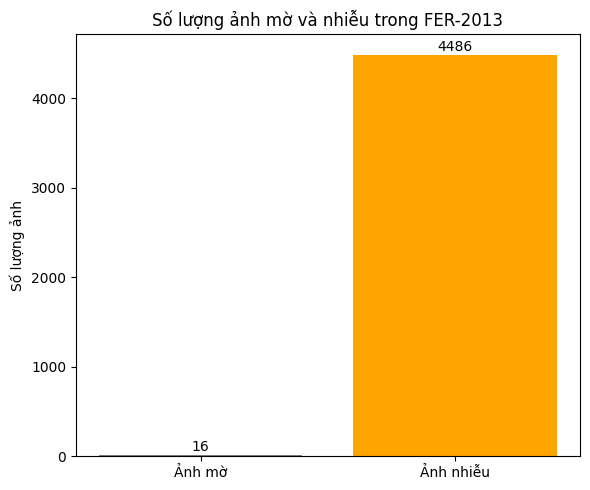

In [55]:
import matplotlib.pyplot as plt

# Số lượng chính xác
num_blurred = int(len(blurred_df))
num_noisy = int(len(noisy_df))

# Vẽ biểu đồ
import matplotlib.pyplot as plt

labels = ['Ảnh mờ', 'Ảnh nhiễu']
values = [num_blurred, num_noisy]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['gray', 'orange'])
plt.title("Số lượng ảnh mờ và nhiễu trong FER-2013")
plt.ylabel("Số lượng ảnh")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 10, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Ảnh ví dụ 

Ảnh mờ:


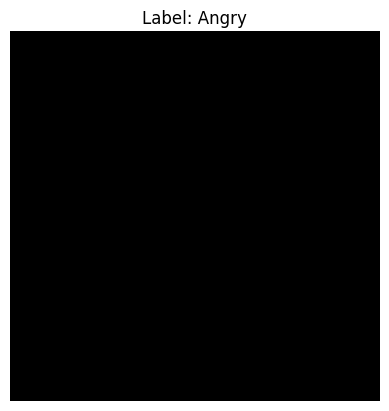

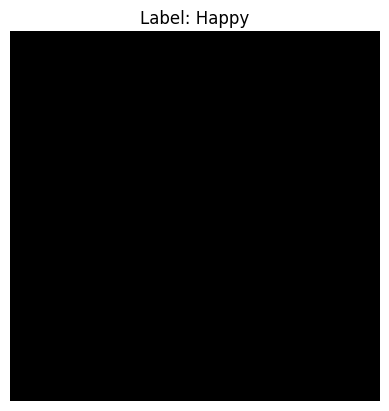

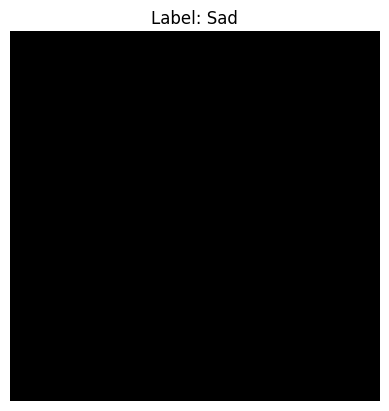

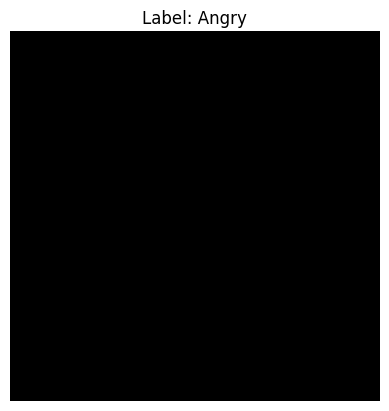

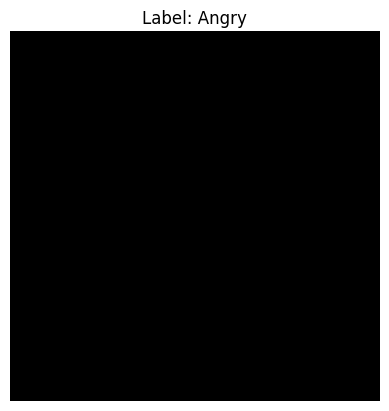

Ảnh nghi nhiễu:


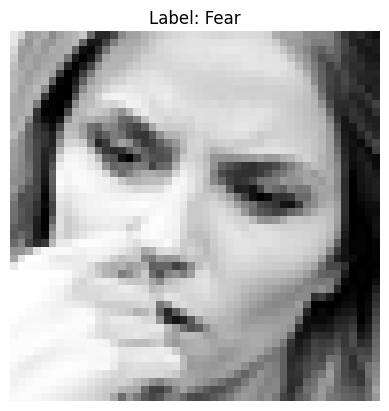

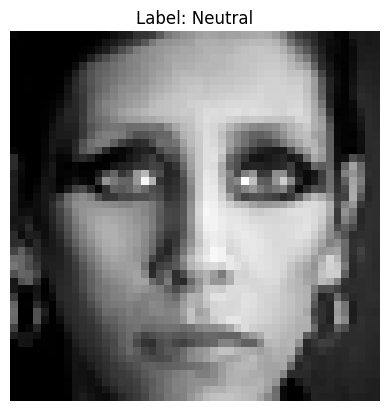

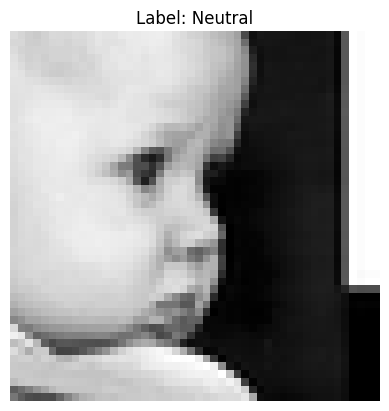

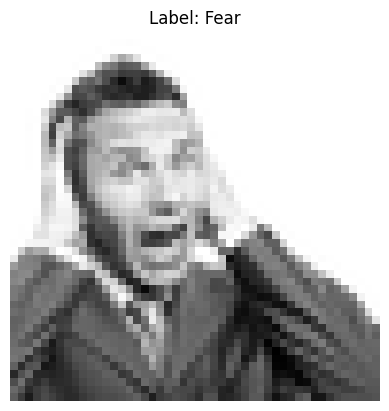

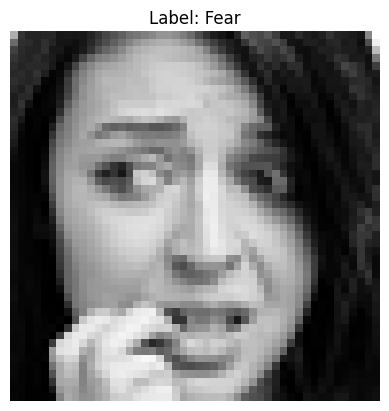

In [50]:
import matplotlib.pyplot as plt

def show_images_from_df(dataframe, n=5):
    for i in range(min(n, len(dataframe))):
        pixels = dataframe.iloc[i]['pixels_array'].reshape(48, 48)
        plt.imshow(pixels, cmap='gray')
        plt.title(f"Label: {emotion_labels[dataframe.iloc[i]['emotion']]}")
        plt.axis('off')
        plt.show()

# Hiển thị ảnh mờ
print("Ảnh mờ:")
show_images_from_df(blurred_df, n=5)

# Hiển thị ảnh nhiễu
print("Ảnh nghi nhiễu:")
show_images_from_df(noisy_df, n=5)
